# Imports 

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing


## Reading Data

In [3]:
df = pd.read_csv(r'C:\Users\elaaf\Desktop\SDS\extra\BitcoinHeistData.csv')
#df = pd.read_csv("/Users/muntaha/Documents/BitcoinHeistData.csv")

In [4]:
df.shape

(2916697, 10)

In [5]:
df.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   address    2916697 non-null  object 
 1   year       2916697 non-null  int64  
 2   day        2916697 non-null  int64  
 3   length     2916697 non-null  int64  
 4   weight     2916697 non-null  float64
 5   count      2916697 non-null  int64  
 6   looped     2916697 non-null  int64  
 7   neighbors  2916697 non-null  int64  
 8   income     2916697 non-null  float64
 9   label      2916697 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 222.5+ MB


In [6]:
len(df.address.unique()) #the address is not unique

2631095

## Correlation before processing the data

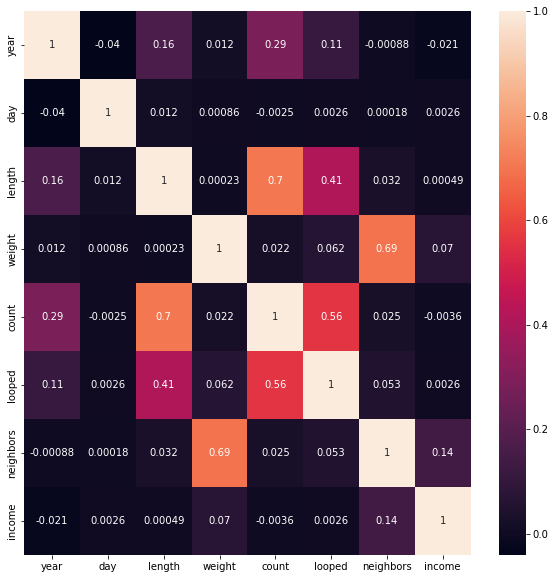

In [7]:
plt.figure(figsize=(10,10));
sns.heatmap(df.corr(), annot=True);

### Ransomware Distribution

In [8]:
to_plot = df.groupby(['label'])['address'].count().drop('white').sort_values(ascending=False)

In [9]:
to_plot

label
paduaCryptoWall                12390
montrealCryptoLocker            9315
princetonCerber                 9223
princetonLocky                  6625
montrealCryptXXX                2419
montrealNoobCrypt                483
montrealDMALockerv3              354
montrealDMALocker                251
montrealSamSam                    62
montrealGlobeImposter             55
montrealCryptoTorLocker2015       55
montrealGlobev3                   34
montrealGlobe                     32
montrealWannaCry                  28
montrealRazy                      13
montrealAPT                       11
paduaKeRanger                     10
montrealFlyper                     9
montrealXTPLocker                  8
montrealXLockerv5.0                7
montrealCryptConsole               7
montrealVenusLocker                7
montrealEDA2                       6
montrealJigSaw                     4
paduaJigsaw                        2
montrealSam                        1
montrealXLocker                 

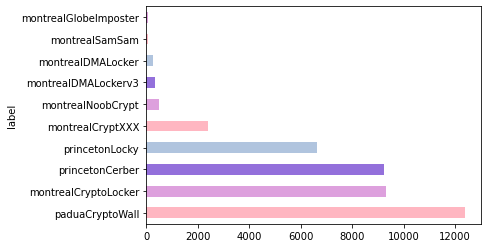

In [10]:
to_plot[:10].plot(kind='barh',color=['lightpink','plum', 'mediumpurple','lightsteelblue']);

### Changing labels to {0, 1}

In [11]:
unique_label = list(set(df.label))

In [12]:

d = {}

for i in unique_label:
    if i != 'white':
        d[i] = 1
    else:
        d[i] = 0


In [13]:
d

{'montrealGlobeImposter': 1,
 'princetonLocky': 1,
 'montrealXLocker': 1,
 'montrealVenusLocker': 1,
 'paduaKeRanger': 1,
 'paduaJigsaw': 1,
 'montrealDMALocker': 1,
 'montrealAPT': 1,
 'montrealXLockerv5.0': 1,
 'montrealGlobev3': 1,
 'montrealXTPLocker': 1,
 'montrealWannaCry': 1,
 'montrealSamSam': 1,
 'white': 0,
 'montrealJigSaw': 1,
 'princetonCerber': 1,
 'montrealSam': 1,
 'paduaCryptoWall': 1,
 'montrealNoobCrypt': 1,
 'montrealComradeCircle': 1,
 'montrealRazy': 1,
 'montrealCryptXXX': 1,
 'montrealGlobe': 1,
 'montrealCryptoTorLocker2015': 1,
 'montrealDMALockerv3': 1,
 'montrealEDA2': 1,
 'montrealCryptoLocker': 1,
 'montrealFlyper': 1,
 'montrealCryptConsole': 1}

In [14]:
df.label.replace(d, inplace=True)

<AxesSubplot:ylabel='address'>

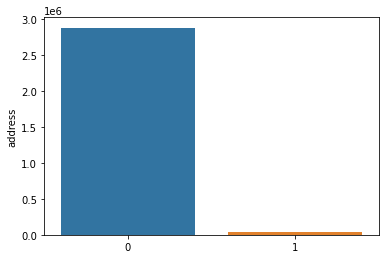

In [15]:
labels_dist = df.groupby(['label'])['address'].count()
sns.barplot(y = labels_dist, x = [0,1])

In [16]:
labels_dist

label
0    2875284
1      41413
Name: address, dtype: int64

In [17]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916697 entries, 0 to 2916696
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   address    2916697 non-null  object 
 1   year       2916697 non-null  int64  
 2   day        2916697 non-null  int64  
 3   length     2916697 non-null  int64  
 4   weight     2916697 non-null  float64
 5   count      2916697 non-null  int64  
 6   looped     2916697 non-null  int64  
 7   neighbors  2916697 non-null  int64  
 8   income     2916697 non-null  float64
 9   label      2916697 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 222.5+ MB


C:\Users\elaaf\AppData\Local\Temp/ipykernel_11228/274559223.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax);


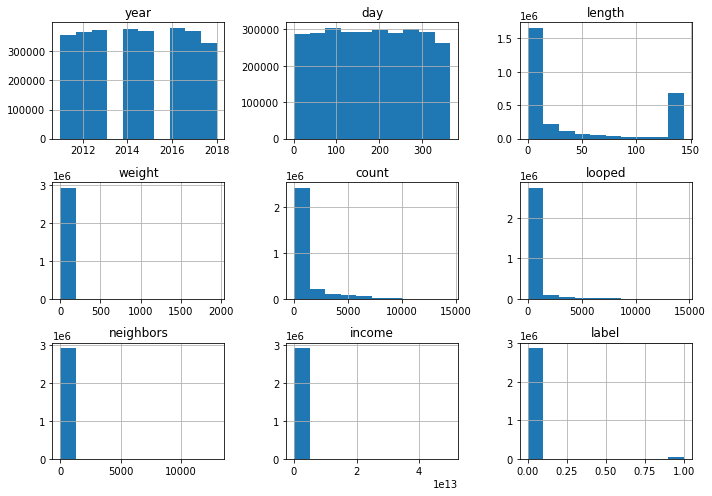

In [18]:
fig = plt.figure(figsize = (10,7));
ax = fig.gca();
df.hist(ax = ax);
plt.tight_layout();

## Power Transformer

In [32]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import  MinMaxScaler, StandardScaler

### 1. Transforming all data with yoe johnson

In [33]:
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
scaler = StandardScaler()
data =df.drop(columns=['address', 'year', 'day', 'label'])
data = scaler.fit_transform(data)


In [34]:
pt_yj = PowerTransformer(method='yeo-johnson')
#data =df.drop(columns=['address', 'year', 'day', 'label'])


In [35]:
pt_yj.fit(data)
print(pt_yj.lambdas_)
test2 = pd.DataFrame(pt_yj.transform(data), columns=['length_t', 'weight_t', 'count_t', 'looped_t', 'neighbors_t', 'income_t'])

[ -0.60227941  -4.09256826  -2.60903465  -7.18959352  -8.63625513
 -47.1508654 ]


In [36]:
test2.head()

length_t  weight_t   count_t  looped_t  neighbors_t  income_t
0 -0.154591 -1.091072 -0.561882 -0.324753     0.455379 -0.604868
1  0.589524 -1.125113 -0.561882 -0.324753    -1.352084 -0.604919
2 -0.937436  1.255339 -0.561882 -0.324753     0.455379 -0.504419
3  1.012617 -1.109661 -0.561882 -0.324753     0.455379 -0.634405
4  1.497203 -0.831220  0.843139 -0.324753    -1.352084 -0.504419

In [37]:
test2.describe()

length_t      weight_t       count_t      looped_t   neighbors_t  \
count  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06   
mean   3.113149e-13  6.668255e-13 -4.710004e-12  2.884656e-12  1.103900e-12   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -9.374362e-01 -1.126146e+00 -5.618822e-01 -3.247533e-01 -1.352084e+00   
25%   -8.385627e-01 -1.036434e+00 -5.618822e-01 -3.247533e-01 -1.352084e+00   
50%   -5.601467e-01 -2.158342e-01 -5.618822e-01 -3.247533e-01  4.553791e-01   
75%    1.312647e+00  1.108565e+00 -3.326962e-01 -3.247533e-01  4.553791e-01   
max    1.497203e+00  2.419680e+00  2.045135e+00  3.203830e+00  3.282510e+00   

           income_t  
count  2.916697e+06  
mean   1.950913e-13  
std    1.000000e+00  
min   -6.770132e-01  
25%   -6.312341e-01  
50%   -5.044207e-01  
75%    1.984229e-01  
max    2.900293e+00

C:\Users\elaaf\AppData\Local\Temp/ipykernel_11228/41954849.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  test2.hist(ax= fig.gca(),);


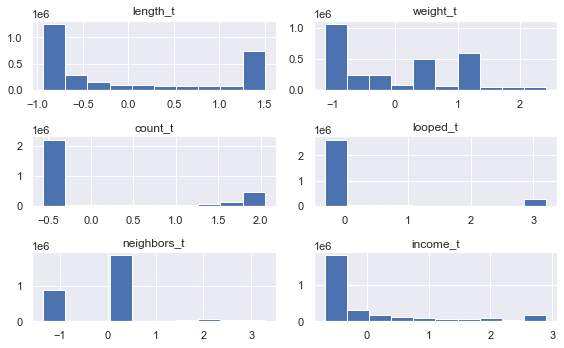

In [38]:
fig = plt.figure(figsize=(8,5))
test2.hist(ax= fig.gca(),);
plt.tight_layout();

In [39]:
df_transformed = pd.concat([df[['address', 'year', 'day','label']].reset_index().drop(columns='index'),
                            test2.reset_index().drop(columns='index')], 
                           axis=1)

In [40]:
#df_transformed.to_csv(path)

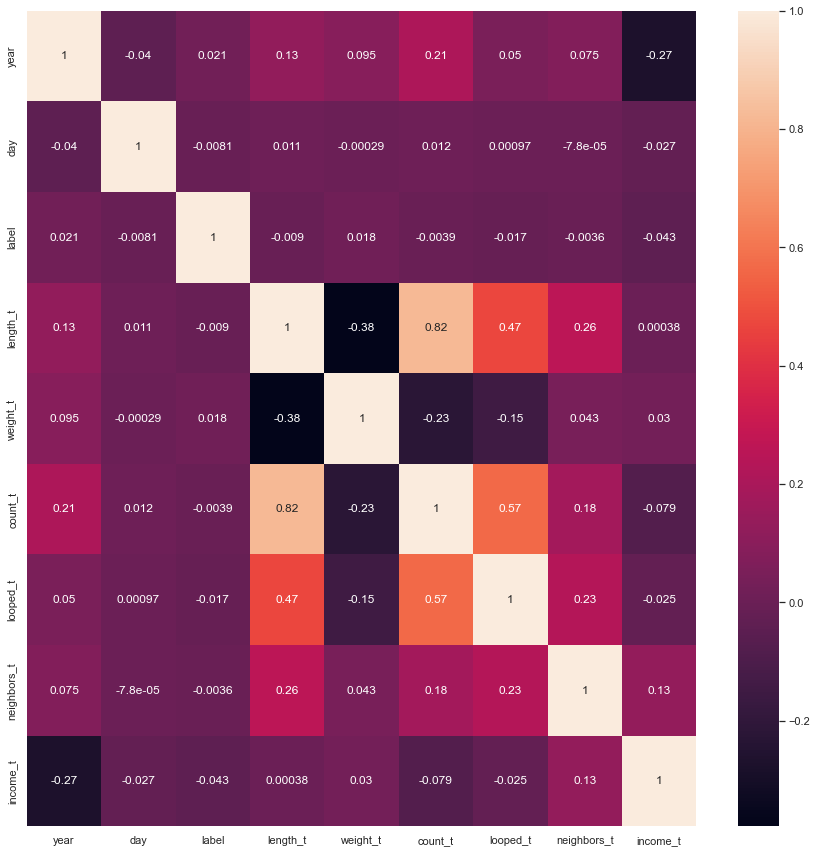

In [41]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df_transformed.corr(), annot=True);

In [42]:
#sns.pairplot(df_transformed, corner=True, hue='label');

### 2. Transforming all data with square root

In [ ]:
#df.insert(len(df.columns), 'A_Sqrt', np.sqrt(df.iloc[:,0]))

In [ ]:
df.iloc[:,0]

## Encoding the address

In [155]:
#change address to numerical (preprocessing.LabelEncoder())
label_encoder = preprocessing.LabelEncoder()
df_transformed['address']=label_encoder.fit_transform(df_transformed['address'])

In [156]:
df_transformed.head()

address  year  day  label  length_t  weight_t   count_t  looped_t  \
0       23  2017   11      1 -0.154591 -1.091072 -0.561882 -0.324753   
1      128  2016  132      1  0.589524 -1.125113 -0.561882 -0.324753   
2      169  2016  246      1 -0.937436  1.255339 -0.561882 -0.324753   
3      217  2016  322      1  1.012617 -1.109661 -0.561882 -0.324753   
4      293  2016  238      1  1.497203 -0.831220  0.843139 -0.324753   

   neighbors_t  income_t  
0     0.455379 -0.604868  
1    -1.352084 -0.604919  
2     0.455379 -0.504419  
3     0.455379 -0.634405  
4    -1.352084 -0.504419

# Handeling Unbalanced Data

## 1. Random Down-Sampling

In [19]:
df_1 = df[(df['label']==1)]

In [20]:
df_1.shape

(41413, 10)

In [21]:
df_1.describe()

year           day        length        weight         count  \
count  41413.000000  41413.000000  41413.000000  4.141300e+04  41413.000000   
mean    2014.876923    174.439741     41.636926  6.274532e-01    599.810277   
std        1.361243     94.700239     58.442350  2.667625e+00   1419.955449   
min     2011.000000      1.000000      0.000000  4.719723e-42      1.000000   
25%     2014.000000     90.000000      0.000000  6.250000e-02      1.000000   
50%     2015.000000    160.000000      6.000000  3.880441e-01      1.000000   
75%     2016.000000    260.000000     80.000000  1.000000e+00     15.000000   
max     2018.000000    365.000000    144.000000  4.982885e+02  13462.000000   

             looped     neighbors        income    label  
count  41413.000000  41413.000000  4.141300e+04  41413.0  
mean      95.100645      2.076256  7.833721e+08      1.0  
std      525.423306      2.401167  1.423362e+10      0.0  
min        0.000000      1.000000  3.000000e+07      1.0  
25%        0.000000      1.000000  8.000000e+07      1.0  
50%        0.000000      2.000000  1.250000e+08      1.0  
75%        0.000000      2.000000  3.000000e+08      1.0  
max    11693.000000     94.000000  2.595000e+12      1.0

In [22]:
df_2 = df[(df['label']==0)].sample(n=41413, random_state=42)

In [23]:
df_2.shape

(41413, 10)

In [24]:
df_2.describe()

year           day        length        weight         count  \
count  41413.000000  41413.000000  41413.000000  4.141300e+04  41413.000000   
mean    2014.469080    182.330500     44.147538  5.861829e-01    717.606355   
std        2.270584    104.431949     58.681944  9.423326e+00   1698.990105   
min     2011.000000      1.000000      0.000000  6.493017e-80      1.000000   
25%     2012.000000     92.000000      2.000000  2.371412e-02      1.000000   
50%     2014.000000    183.000000      8.000000  2.500000e-01      1.000000   
75%     2016.000000    272.000000     98.000000  9.062500e-01     53.000000   
max     2018.000000    365.000000    144.000000  1.866717e+03  14494.000000   

             looped     neighbors        income    label  
count  41413.000000  41413.000000  4.141300e+04  41413.0  
mean     240.033275      2.414121  3.816353e+09      0.0  
std      966.557317     58.450442  7.154849e+10      0.0  
min        0.000000      1.000000  3.000000e+07      0.0  
25%        0.000000      1.000000  7.466611e+07      0.0  
50%        0.000000      2.000000  2.000000e+08      0.0  
75%        0.000000      2.000000  1.000000e+09      0.0  
max    13833.000000  11746.000000  1.067816e+13      0.0

In [25]:
df_new = pd.concat([df_1, df_2])

<AxesSubplot:ylabel='address'>

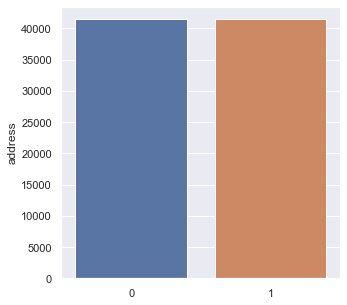

In [26]:
sns.set(rc={'figure.figsize':(5,5)})
labels_dist_ = df_new.groupby(['label'])['address'].count()
sns.barplot(y = labels_dist_, x = [0,1])

In [27]:
#sns.pairplot(df_new, hue='label');

In [28]:
#sns.pairplot(df_new);

C:\Users\elaaf\AppData\Local\Temp/ipykernel_11228/3678586302.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_new.hist(ax = ax);


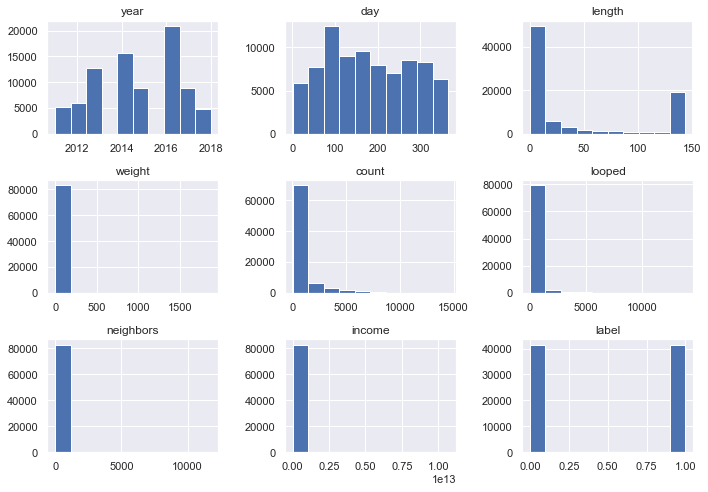

In [29]:
fig = plt.figure(figsize = (10,7));
ax = fig.gca();
df_new.hist(ax = ax);
plt.tight_layout();

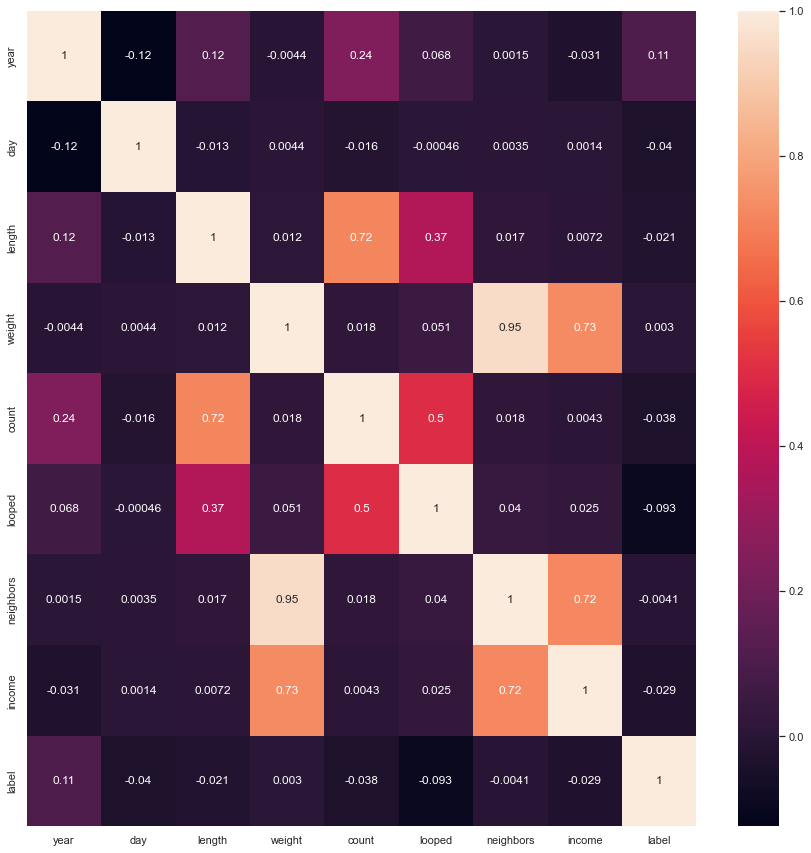

In [30]:
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(df_new.corr(), annot=True);

In [31]:
## TODO: save model
#df_new.to_csv(r'C:\Users\elaaf\Desktop\SDS\Project_3\Data\BMT_balanced.csv')

## 2. Combined Approch:
    1. Random down-sampling for majority class
    2. SMOTE for 20% of the minority class
    3. Oversampling 20% - Duplicates
    4. weights 10% and f1-balance
    PS: will be used later

In [81]:
import imblearn.under_sampling as undersampling


### 1. TomekLinks down-sampling for majority class

In [157]:
X = df_transformed.drop(columns=['label'])
y = df_transformed.label

In [158]:
undersample = undersampling.TomekLinks(sampling_strategy='majority')
X_sampled, y_sampled  = undersample.fit_resample(X,y)

In [159]:
X_sampled.head()

address  year  day  length_t  weight_t   count_t  looped_t  neighbors_t  \
0       23  2017   11 -0.154591 -1.091072 -0.561882 -0.324753     0.455379   
1      128  2016  132  0.589524 -1.125113 -0.561882 -0.324753    -1.352084   
2      169  2016  246 -0.937436  1.255339 -0.561882 -0.324753     0.455379   
3      217  2016  322  1.012617 -1.109661 -0.561882 -0.324753     0.455379   
4      293  2016  238  1.497203 -0.831220  0.843139 -0.324753    -1.352084   

   income_t  
0 -0.604868  
1 -0.604919  
2 -0.504419  
3 -0.634405  
4 -0.504419

In [160]:
y_sampled.value_counts()

0    2861802
1      41413
Name: label, dtype: int64

In [161]:
df['label'].value_counts()

0    2875284
1      41413
Name: label, dtype: int64

#### Didn't reduce much of the data (only 13k), we will use EditedNearestNeighbours (reduced ~64k)

In [162]:
undersample = undersampling.EditedNearestNeighbours(sampling_strategy='majority')

In [163]:
X_sampled, y_sampled  = undersample.fit_resample(X_sampled,y_sampled)

In [164]:
y_sampled.value_counts()

0    2798128
1      41413
Name: label, dtype: int64

In [165]:
df_transformed_cleaned = pd.concat([X_sampled, pd.DataFrame(y_sampled)], axis = 1)

In [ ]:
#try to balance the data and then apply transofrmation

In [91]:
#undersample = undersampling.NeighbourhoodCleaningRule(sampling_strategy='majority')

In [92]:
#X_sampled, y_sampled  = undersample.fit_resample(X_sampled,y_sampled)

In [ ]:
#y_sampled.value_counts()

In [167]:
df_transformed_cleaned.to_csv(r'..\Data\data_undersampled_scaled_tranformed_v1.csv')

In [ ]:
df_transformed_cleaned

In [93]:
#undersample = undersampling.RandomUnderSampler(sampling_strategy='majority')

In [94]:
#X_sampled, y_sampled  = undersample.fit_resample(X_sampled,y_sampled)

In [95]:
#y_sampled.value_counts()

0    41413
1    41413
Name: label, dtype: int64

In [169]:
#y_sampled

<AxesSubplot:>

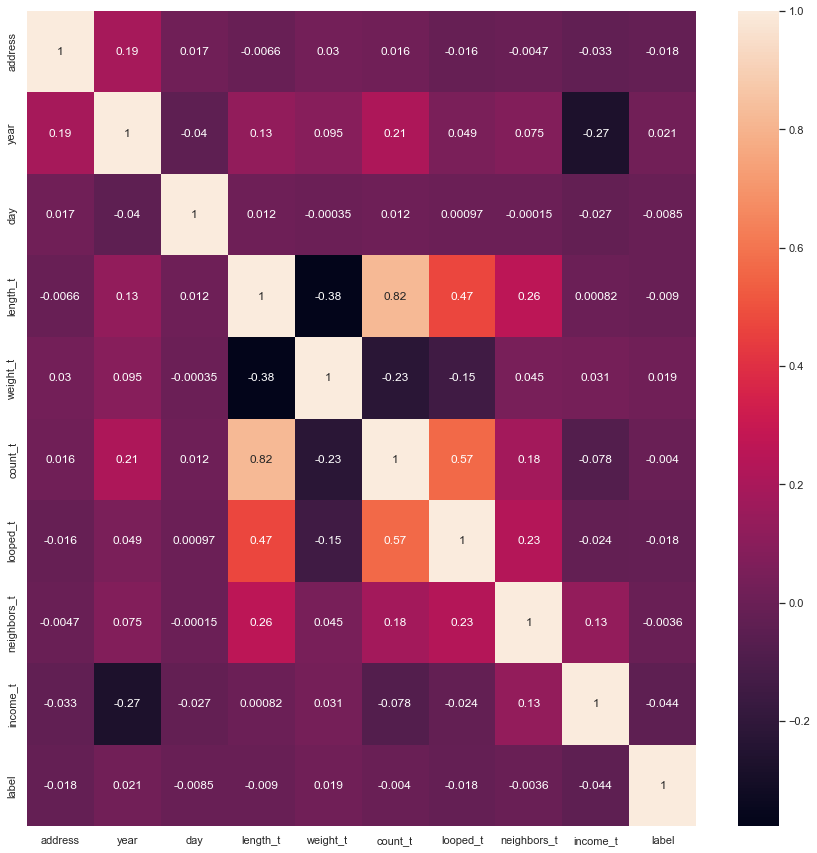

In [168]:
sns.heatmap(df_transformed_cleaned.corr(), annot=True)

In [170]:
df_transformed_cleaned.shape

(2839541, 10)